In [1]:
import os

# List files in /content/
print(os.listdir('/content/'))

['.config', 'lesion_segmentation.zip', 'sample_data']


In [2]:
!ls -la /content/

total 624908
drwxr-xr-x 1 root root      4096 Mar 31 12:32 .
drwxr-xr-x 1 root root      4096 Mar 31 12:17 ..
drwxr-xr-x 4 root root      4096 Mar 24 13:27 .config
-rw-r--r-- 1 root root 639883532 Mar 31 12:39 lesion_segmentation.zip
drwxr-xr-x 1 root root      4096 Mar 24 13:28 sample_data


In [3]:
import os
print(os.path.exists('/content/lesion_segmentation.zip'))

True


In [4]:
import os
import zipfile

zip_path = '/content/lesion_segmentation.zip'
extract_path = '/content/retina_dataset'

print(f"zip_path: {zip_path}")

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

!ls -la {extract_path}

zip_path: /content/lesion_segmentation.zip
total 16
drwxr-xr-x 4 root root 4096 Mar 31 12:40 .
drwxr-xr-x 1 root root 4096 Mar 31 12:40 ..
drwxr-xr-x 5 root root 4096 Mar 31 12:40 lesion_segmentation
drwxr-xr-x 3 root root 4096 Mar 31 12:40 __MACOSX


In [6]:
!ls -la /content/retina_dataset/lesion_segmentation

total 20
drwxr-xr-x 5 root root 4096 Mar 31 12:40 .
drwxr-xr-x 4 root root 4096 Mar 31 12:40 ..
drwxr-xr-x 4 root root 4096 Mar 31 12:40 test
drwxr-xr-x 4 root root 4096 Mar 31 12:40 train
drwxr-xr-x 4 root root 4096 Mar 31 12:40 valid


In [8]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.6 MB/s eta 0:00:00


Visualizing training samples:


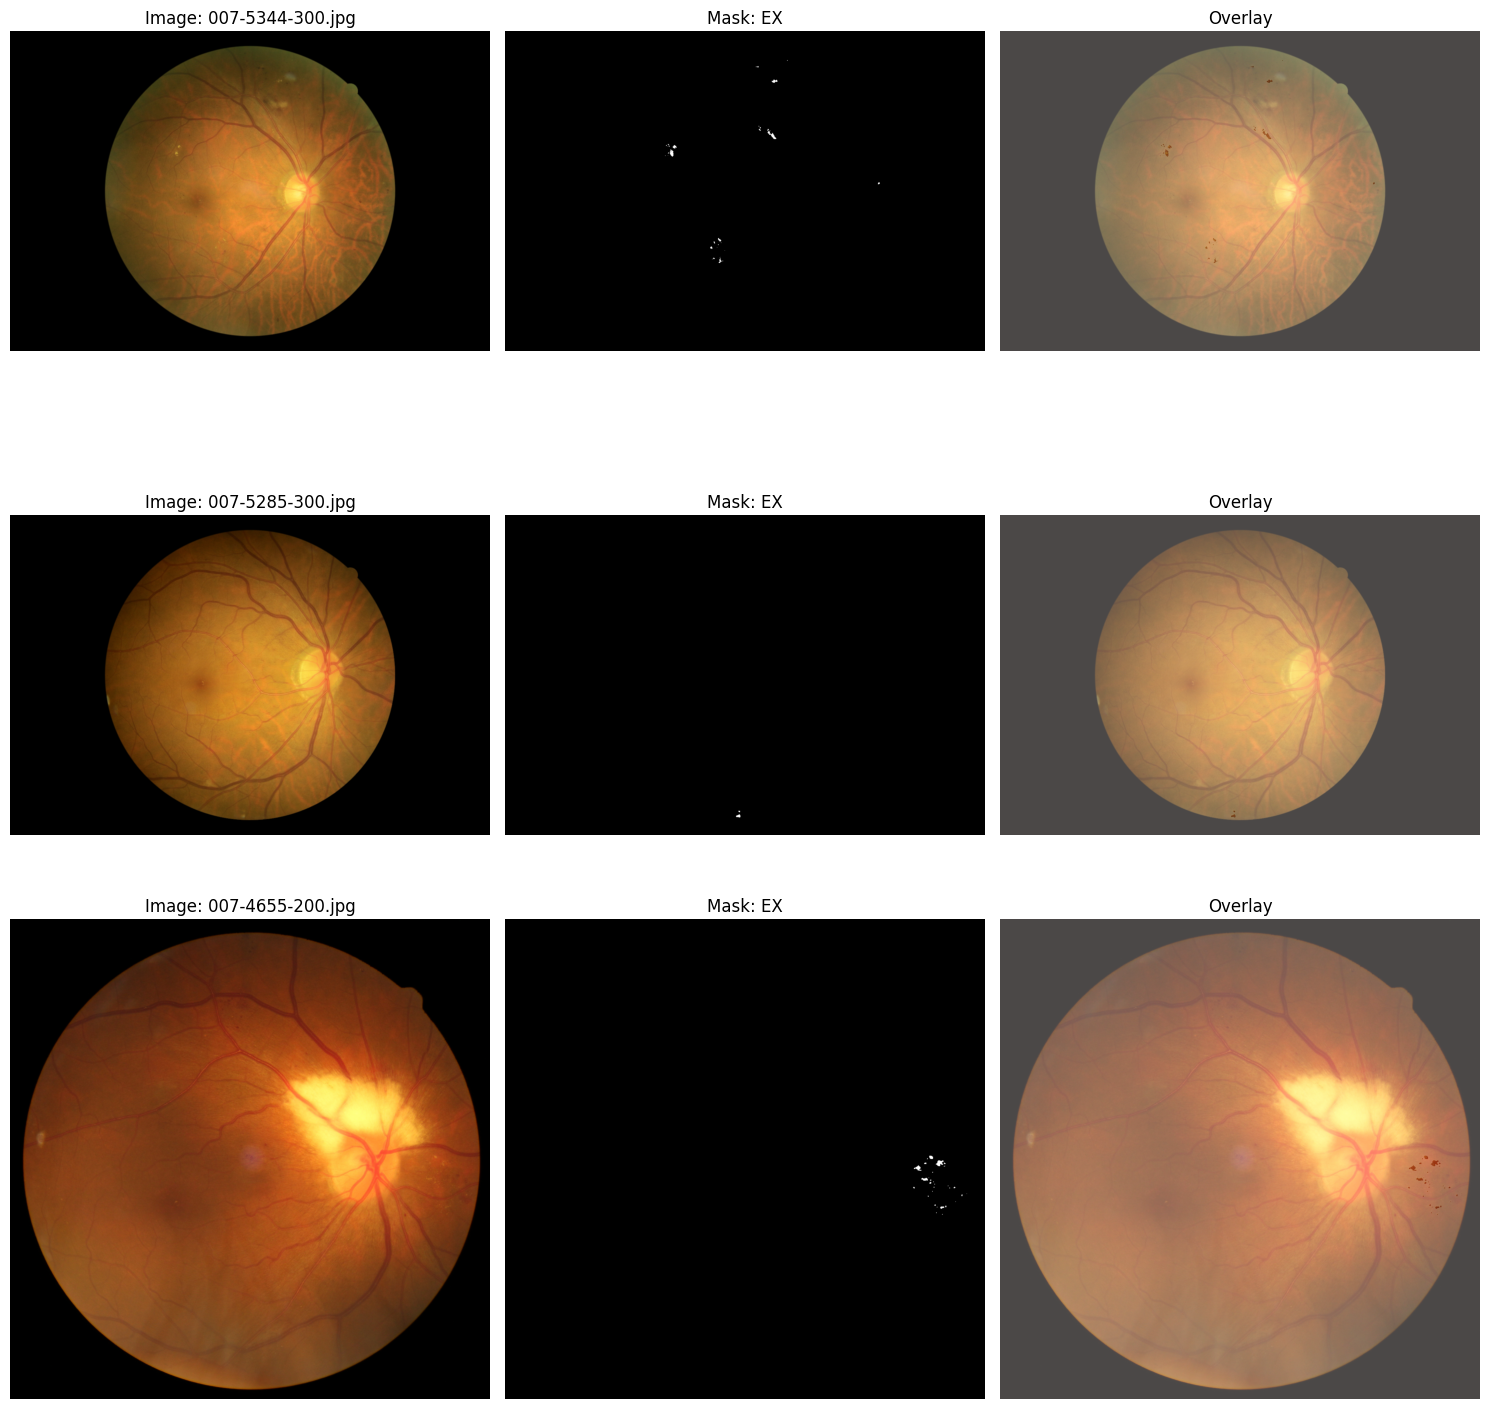

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from glob import glob

# Define paths
BASE_DIR = '/content/retina_dataset/lesion_segmentation'
TRAIN_IMG_DIR = os.path.join(BASE_DIR, 'train/image')
TRAIN_LABEL_DIR = os.path.join(BASE_DIR, 'train/label')
VAL_IMG_DIR = os.path.join(BASE_DIR, 'valid/image')
VAL_LABEL_DIR = os.path.join(BASE_DIR, 'valid/label')
TEST_IMG_DIR = os.path.join(BASE_DIR, 'test/image')
TEST_LABEL_DIR = os.path.join(BASE_DIR, 'test/label')

LESION_TYPE = 'EX'

# Function to visualize images and their masks
def visualize_samples(img_dir, label_dir, lesion_type, num_samples=3):
    image_paths = sorted(glob(os.path.join(img_dir, '*.jpg')))

    if len(image_paths) > num_samples:
        image_paths = random.sample(image_paths, num_samples)

    plt.figure(figsize=(15, 5*num_samples))

    for i, img_path in enumerate(image_paths):
        img_filename = os.path.basename(img_path)
        mask_filename = os.path.splitext(img_filename)[0] + '.tif'
        mask_path = os.path.join(label_dir, lesion_type, mask_filename)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if os.path.exists(mask_path):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = (mask > 0).astype(np.uint8) * 255
        else:
            print(f"Mask not found: {mask_path}")
            mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

        plt.subplot(num_samples, 3, i*3+1)
        plt.title(f"Image: {img_filename}")
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(num_samples, 3, i*3+2)
        plt.title(f"Mask: {lesion_type}")
        plt.imshow(mask, cmap='gray')
        plt.axis('off')

        plt.subplot(num_samples, 3, i*3+3)
        plt.title("Overlay")
        plt.imshow(img)
        plt.imshow(mask, alpha=0.3, cmap='Reds')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Visualizing training samples:")
visualize_samples(TRAIN_IMG_DIR, TRAIN_LABEL_DIR, LESION_TYPE)

In [11]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


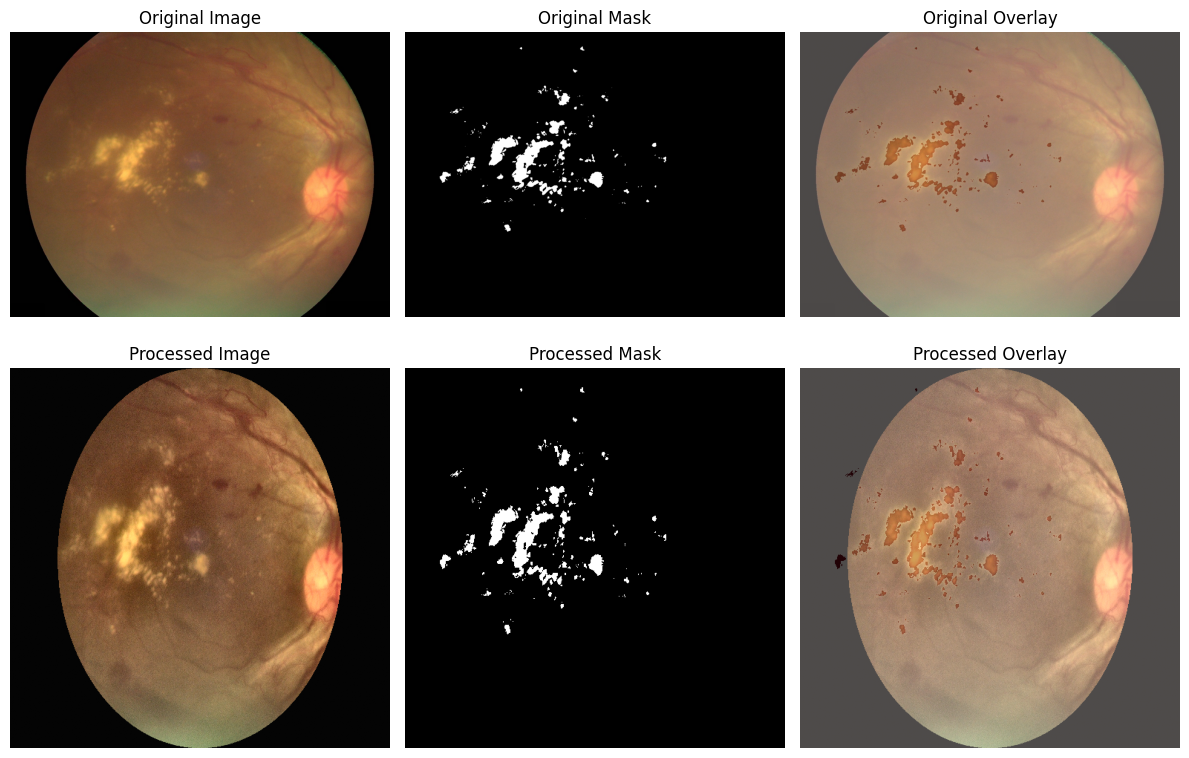

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from glob import glob

# Define constants and paths
IMG_SIZE = (512, 512)  # Same as in the paper
BATCH_SIZE = 8

def preprocess_image(image_path, mask_path, img_size=IMG_SIZE):
    """
    Enhanced preprocessing function with:
    - Image loading
    - Background cropping
    - CLAHE contrast enhancement
    - Resizing to fixed dimensions
    """
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read the mask if it exists
    if os.path.exists(mask_path):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        # Binarize mask (0 for background, 1 for lesion)
        mask = (mask > 0).astype(np.uint8)
    else:
        # Create an empty mask if no lesion is present
        mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    # Crop the background (simple circular mask as initial implementation)
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    radius = min(w, h) // 2  # This can be improved with optic disc detection

    # Create a circular mask
    circle_mask = np.zeros((h, w), dtype=np.uint8)
    cv2.circle(circle_mask, center, radius, 1, -1)
    circle_mask = circle_mask.astype(bool)

    # Apply the mask
    for c in range(3):  # Apply to each color channel
        img[:,:,c] = np.where(circle_mask, img[:,:,c], 0)

    # Apply CLAHE for contrast enhancement - Fixed version
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)  # This returns a tuple
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)  # Apply CLAHE to the L channel
    lab = cv2.merge([l, a, b])  # Merge back
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    # Resize both image and mask
    img = cv2.resize(img, img_size)
    mask = cv2.resize(mask, img_size)

    # Normalize image to [0, 1] range
    img = img / 255.0

    return img, mask

# Test preprocessing on a sample image
def test_preprocessing():
    # Get a sample image path
    sample_img_path = glob(os.path.join(TRAIN_IMG_DIR, '*.jpg'))[0]
    img_filename = os.path.basename(sample_img_path)
    mask_filename = os.path.splitext(img_filename)[0] + '.tif'
    sample_mask_path = os.path.join(TRAIN_LABEL_DIR, LESION_TYPE, mask_filename)

    # Read original image and mask
    orig_img = cv2.imread(sample_img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    if os.path.exists(sample_mask_path):
        orig_mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)
        orig_mask = (orig_mask > 0).astype(np.uint8) * 255
    else:
        orig_mask = np.zeros((orig_img.shape[0], orig_img.shape[1]), dtype=np.uint8)

    # Apply preprocessing
    processed_img, processed_mask = preprocess_image(sample_img_path, sample_mask_path)

    # Display results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(orig_img)
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title("Original Mask")
    plt.imshow(orig_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title("Original Overlay")
    plt.imshow(orig_img)
    plt.imshow(orig_mask, alpha=0.3, cmap='Reds')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title("Processed Image")
    plt.imshow(processed_img)
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title("Processed Mask")
    plt.imshow(processed_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title("Processed Overlay")
    plt.imshow(processed_img)
    plt.imshow(processed_mask, alpha=0.3, cmap='Reds')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the test
test_preprocessing()

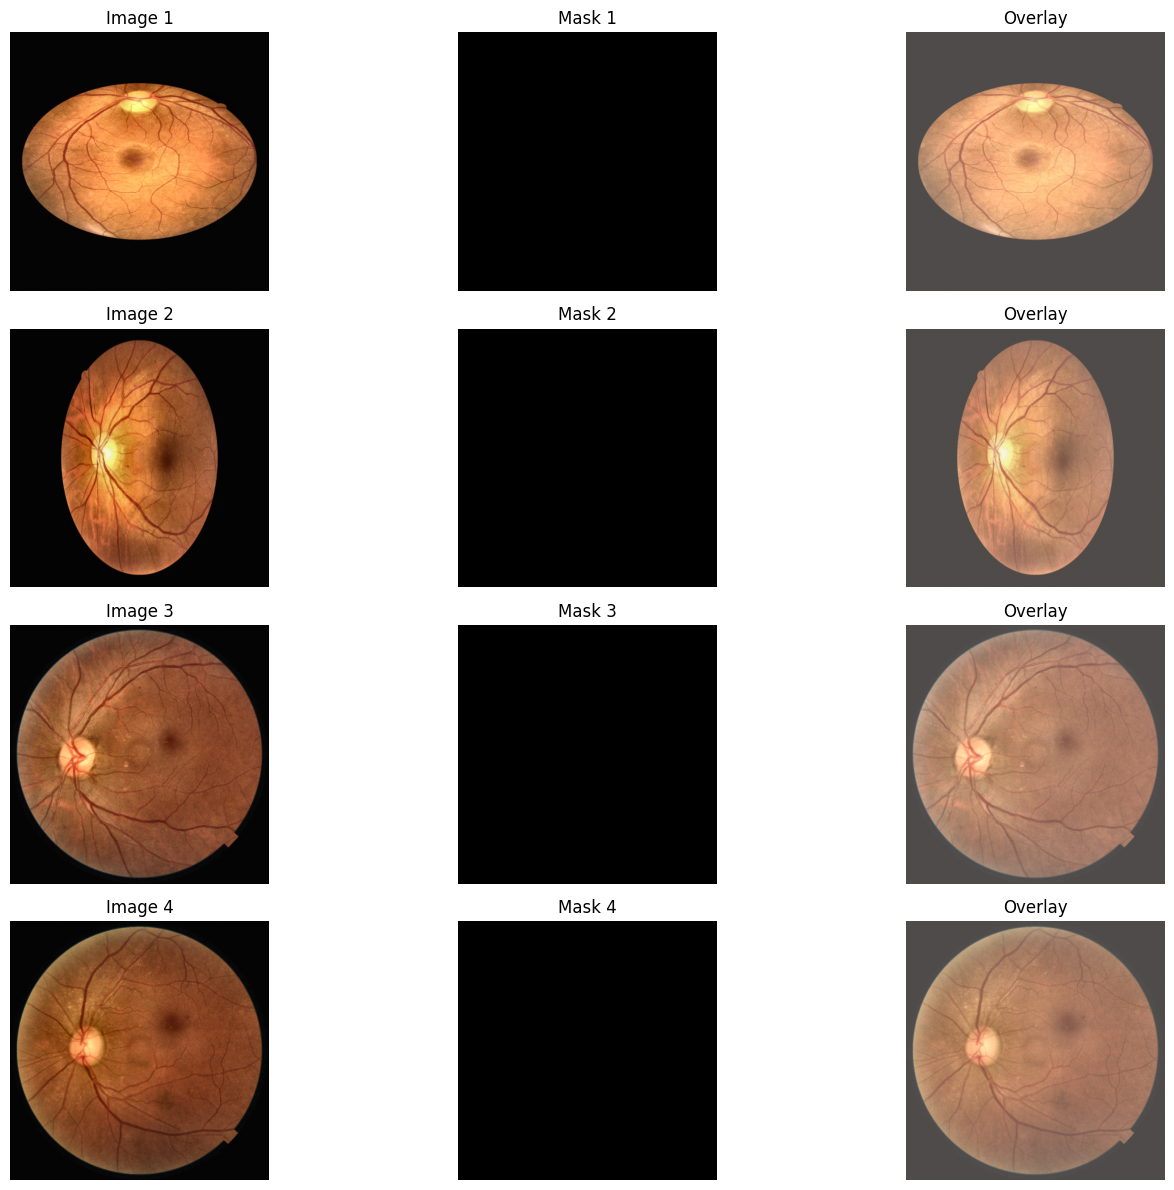

Batch image shape: (4, 512, 512, 3)
Batch mask shape: (4, 512, 512, 1)


In [13]:
def data_generator(image_dir, label_dir, lesion_type, batch_size=BATCH_SIZE, img_size=IMG_SIZE, augment=False):
    """
    Create a data generator with optional augmentation
    """
    # Get all image paths
    image_paths = sorted(glob(os.path.join(image_dir, '*.jpg')))

    # Create corresponding mask paths
    mask_paths = []
    for img_path in image_paths:
        img_filename = os.path.basename(img_path)
        mask_filename = os.path.splitext(img_filename)[0] + '.tif'
        mask_path = os.path.join(label_dir, lesion_type, mask_filename)
        mask_paths.append(mask_path)

    # Calculate number of batches
    n_samples = len(image_paths)
    n_batches = n_samples // batch_size
    if n_samples % batch_size != 0:
        n_batches += 1

    # Generator loop
    i = 0
    while True:
        batch_images = []
        batch_masks = []

        for b in range(batch_size):
            if i == len(image_paths):
                i = 0  # Reset when we reach the end of the dataset

                # Shuffle for next epoch
                temp = list(zip(image_paths, mask_paths))
                np.random.shuffle(temp)
                image_paths, mask_paths = zip(*temp)
                image_paths, mask_paths = list(image_paths), list(mask_paths)

            # Preprocess image and mask
            img, mask = preprocess_image(image_paths[i], mask_paths[i], img_size)

            # Apply augmentation if enabled
            if augment:
                # Random horizontal flip
                if np.random.random() > 0.5:
                    img = np.fliplr(img)
                    mask = np.fliplr(mask)

                # Random vertical flip
                if np.random.random() > 0.5:
                    img = np.flipud(img)
                    mask = np.flipud(mask)

                # Random rotation (90, 180, 270 degrees)
                rot_times = np.random.randint(0, 4)  # 0: no rotation, 1: 90°, 2: 180°, 3: 270°
                img = np.rot90(img, rot_times)
                mask = np.rot90(mask, rot_times)

                # Random brightness and contrast
                if np.random.random() > 0.5:
                    # Adjust brightness
                    brightness = np.random.uniform(0.8, 1.2)
                    img = np.clip(img * brightness, 0, 1.0)

            # Add channel dimension to mask and append to batch
            mask = np.expand_dims(mask, axis=-1)
            batch_images.append(img)
            batch_masks.append(mask)

            i += 1

        # Convert batches to numpy arrays
        batch_images = np.array(batch_images)
        batch_masks = np.array(batch_masks)

        yield batch_images, batch_masks

# Test the data generator
def test_generator():
    # Create a generator for training data
    gen = data_generator(TRAIN_IMG_DIR, TRAIN_LABEL_DIR, LESION_TYPE, batch_size=4, augment=True)

    # Get a batch
    images, masks = next(gen)

    # Display the batch
    plt.figure(figsize=(15, 12))
    for i in range(len(images)):
        plt.subplot(4, 3, i*3+1)
        plt.title(f"Image {i+1}")
        plt.imshow(images[i])
        plt.axis('off')

        plt.subplot(4, 3, i*3+2)
        plt.title(f"Mask {i+1}")
        plt.imshow(masks[i, :, :, 0], cmap='gray')
        plt.axis('off')

        plt.subplot(4, 3, i*3+3)
        plt.title("Overlay")
        plt.imshow(images[i])
        plt.imshow(masks[i, :, :, 0], alpha=0.3, cmap='Reds')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Batch image shape: {images.shape}")
    print(f"Batch mask shape: {masks.shape}")

# Run the test
test_generator()

In [15]:
from tensorflow.keras import layers, models, callbacks


In [35]:
def conv_block(inputs, filters, kernel_size=3, dilation_rate=1):
    """
    Basic convolutional block with BatchNorm and ReLU
    """
    x = layers.Conv2D(filters, kernel_size, padding='same',
                      dilation_rate=dilation_rate, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def atrous_spatial_pyramid_pooling(inputs):
    """
    ASPP module with multiple dilated convolutions and global pooling
    """
    # Get input shape
    shape = inputs.shape

    # Apply different dilation rates
    conv_1x1 = conv_block(inputs, 256, kernel_size=1)
    conv_3x3_1 = conv_block(inputs, 256, kernel_size=3, dilation_rate=6)
    conv_3x3_2 = conv_block(inputs, 256, kernel_size=3, dilation_rate=12)
    conv_3x3_3 = conv_block(inputs, 256, kernel_size=3, dilation_rate=18)

    # Global pooling branch
    global_avg_pool = layers.GlobalAveragePooling2D()(inputs)
    global_avg_pool = layers.Reshape((1, 1, shape[-1]))(global_avg_pool)
    global_avg_pool = conv_block(global_avg_pool, 256, kernel_size=1)
    global_avg_pool = layers.UpSampling2D(size=(shape[1], shape[2]),
                                          interpolation='bilinear')(global_avg_pool)

    # Concatenate all branches
    x = layers.Concatenate()([conv_1x1, conv_3x3_1, conv_3x3_2, conv_3x3_3, global_avg_pool])
    x = conv_block(x, 256, kernel_size=1)

    return x


def build_improved_deeplabv3_plus(img_size, num_classes=1):
    """
    Build the improved DeepLab-v3+ model for exudate segmentation
    Based on the modifications suggested in the paper
    """
    # Define input
    inputs = layers.Input(shape=(img_size[0], img_size[1], 3))

    # Encoder: ResNet50 as backbone (pre-trained on ImageNet)
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)

    # Get low-level features from encoder
    low_level_features = base_model.get_layer('conv2_block3_out').output  # Earlier layer for more detail

    # Get output from the encoder (high-level features)
    x = base_model.output

    # Apply ASPP
    x = atrous_spatial_pyramid_pooling(x)

    # Decoder
    # Get the shapes for debugging
    low_level_shape = tf.keras.backend.int_shape(low_level_features)
    x_shape = tf.keras.backend.int_shape(x)

    print(f"Low-level features shape: {low_level_shape}")
    print(f"High-level features after ASPP shape: {x_shape}")

    # Calculate the upsampling size needed to match the low-level features
    # This ensures we upsample by the correct factor
    upsampling_factor = (
        low_level_shape[1] // x_shape[1],
        low_level_shape[2] // x_shape[2]
    )

    # Upsample high-level features to match low-level features size
    x = layers.UpSampling2D(size=upsampling_factor, interpolation='bilinear')(x)

    # Process low-level features with 1x1 convolution to reduce channels
    low_level_features = conv_block(low_level_features, 48, kernel_size=1)

    # Concatenate low-level features with upsampled features
    x = layers.Concatenate()([x, low_level_features])

    # Apply more convolutions for better feature fusion
    x = conv_block(x, 256, kernel_size=3)
    x = conv_block(x, 256, kernel_size=3)

    # Calculate final upsampling factor to reach original image size
    final_shape = tf.keras.backend.int_shape(x)
    final_upsampling = (
        img_size[0] // final_shape[1],
        img_size[1] // final_shape[2]
    )

    # Additional improvement: Deep supervision with auxiliary loss
    aux_output = base_model.get_layer('conv4_block6_out').output
    aux_output = conv_block(aux_output, 256, kernel_size=3)
    aux_shape = tf.keras.backend.int_shape(aux_output)
    aux_upsampling = (
        img_size[0] // aux_shape[1],
        img_size[1] // aux_shape[2]
    )
    aux_output = layers.UpSampling2D(size=aux_upsampling, interpolation='bilinear')(aux_output)
    aux_output = layers.Conv2D(num_classes, 1, padding='same', activation='sigmoid',
                               name='auxiliary_output')(aux_output)

    # Final upsampling and prediction
    x = layers.UpSampling2D(size=final_upsampling, interpolation='bilinear')(x)
    main_output = layers.Conv2D(num_classes, 1, padding='same', activation='sigmoid',
                               name='main_output')(x)

    # Create model with multiple outputs
    model = tf.keras.Model(inputs=inputs, outputs=[main_output, aux_output])

    return model

# Initialize and compile the model
IMG_SIZE = (512, 512)  # Adjust as needed, keeping in mind memory constraints
NUM_CLASSES = 1  # Binary segmentation (exudate vs. background)

model = build_improved_deeplabv3_plus(IMG_SIZE, NUM_CLASSES)

# UPDATED: Fixed loss functions using Keras backend for compatibility
def dice_coef(y_true, y_pred, smooth=1.0):
    """Dice coefficient using Keras backend"""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    """Dice loss using Keras backend"""
    return 1 - dice_coef(y_true, y_pred)

def weighted_bce(y_true, y_pred, beta=10.0):
    """Weighted binary crossentropy using Keras backend"""
    # Using Keras built-in binary crossentropy with from_logits=False
    bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)

    # Apply weights using Keras backend operations
    weight_vector = beta * y_true + (1. - y_true)
    weighted_bce = bce * weight_vector

    return tf.keras.backend.mean(weighted_bce)

def combined_loss(y_true, y_pred):
    """Combined loss using dice and weighted BCE"""
    return 0.5 * dice_loss(y_true, y_pred) + 0.5 * weighted_bce(y_true, y_pred)

def iou_coef(y_true, y_pred, smooth=1.0):
    """IoU coefficient using Keras backend"""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# Display model summary
model.summary()

# Recompile the model with the updated loss functions
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'main_output': combined_loss,
        'auxiliary_output': combined_loss
    },
    loss_weights={
        'main_output': 1.0,
        'auxiliary_output': 0.4
    },
    metrics={
        'main_output': [dice_coef, iou_coef],
        'auxiliary_output': [dice_coef, iou_coef]
    }
)





# COMPLETELY REVISED MODEL COMPILATION WITH BUILT-IN LOSSES

# First, recreate the model to start fresh
model = build_improved_deeplabv3_plus(IMG_SIZE, NUM_CLASSES)

# Compile with built-in binary crossentropy and mean IoU
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'main_output': tf.keras.losses.BinaryCrossentropy(),
        'auxiliary_output': tf.keras.losses.BinaryCrossentropy()
    },
    loss_weights={
        'main_output': 1.0,
        'auxiliary_output': 0.4
    },
    metrics={
        'main_output': [
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.MeanIoU(num_classes=2, name='mean_iou')  # 2 classes for binary mask
        ],
        'auxiliary_output': [
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.MeanIoU(num_classes=2, name='mean_iou')
        ]
    }
)

Low-level features shape: (None, 128, 128, 256)
High-level features after ASPP shape: (None, 16, 16, 256)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 518, 518, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 256, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 256, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 256, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 258, 258, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 128, 128, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 128, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 128, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 128, 128, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 128, 128, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 42,791,490 (163.24 MB)

 Trainable params: 42,733,666 (163.02 MB)

 Non-trainable params: 57,824 (225.88 KB)

In [36]:
# Define callbacks for better training
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_exudate_model.h5',
        monitor='val_main_output_dice_coefficient',
        mode='max',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_main_output_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_main_output_dice_coefficient',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir='./logs',
        update_freq='epoch'
    )
]

# Create the training and validation generators
train_gen = data_generator(
    TRAIN_IMG_DIR,
    TRAIN_LABEL_DIR,
    LESION_TYPE,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    augment=True
)

val_gen = data_generator(
    VAL_IMG_DIR,
    VAL_LABEL_DIR,
    LESION_TYPE,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    augment=False
)

# Calculate steps per epoch based on dataset size
train_images = glob(os.path.join(TRAIN_IMG_DIR, '*.jpg'))
if not train_images:
    train_images = glob(os.path.join(TRAIN_IMG_DIR, '*.png'))

val_images = glob(os.path.join(VAL_IMG_DIR, '*.jpg'))
if not val_images:
    val_images = glob(os.path.join(VAL_IMG_DIR, '*.png'))

train_steps = len(train_images) // BATCH_SIZE
if len(train_images) % BATCH_SIZE != 0:
    train_steps += 1

val_steps = len(val_images) // BATCH_SIZE
if len(val_images) % BATCH_SIZE != 0:
    val_steps += 1

print(f"Training steps per epoch: {train_steps}")
print(f"Validation steps per epoch: {val_steps}")

# Prepare the model's output structure for the generator
# Since our model has two outputs, we need to adapt the generator output
def train_generator_wrapper(gen):
    for X, y in gen:
        yield X, {'main_output': y, 'auxiliary_output': y}

def val_generator_wrapper(gen):
    for X, y in gen:
        yield X, {'main_output': y, 'auxiliary_output': y}

train_gen_wrapped = train_generator_wrapper(train_gen)
val_gen_wrapped = val_generator_wrapper(val_gen)

Training steps per epoch: 48
Validation steps per epoch: 19


In [38]:
# Check if a single batch works
test_batch_X, test_batch_Y = next(train_gen_wrapped)
try:
    # Test with a single batch
    mini_history = model.train_on_batch(test_batch_X, test_batch_Y)
    print("Single batch training successful!")
    print("Loss values:", mini_history)
except Exception as e:
    print(f"Error during training: {type(e).__name__}")
    print(e)

Error during training: AttributeError
'numpy.ndarray' object has no attribute 'keys'


In [39]:
def conv_block(inputs, filters, kernel_size=3, dilation_rate=1):
    """
    Basic convolutional block with BatchNorm and ReLU
    """
    x = layers.Conv2D(filters, kernel_size, padding='same',
                      dilation_rate=dilation_rate, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def atrous_spatial_pyramid_pooling(inputs):
    """
    ASPP module with multiple dilated convolutions and global pooling
    """
    # Get input shape
    shape = inputs.shape

    # Apply different dilation rates
    conv_1x1 = conv_block(inputs, 256, kernel_size=1)
    conv_3x3_1 = conv_block(inputs, 256, kernel_size=3, dilation_rate=6)
    conv_3x3_2 = conv_block(inputs, 256, kernel_size=3, dilation_rate=12)
    conv_3x3_3 = conv_block(inputs, 256, kernel_size=3, dilation_rate=18)

    # Global pooling branch
    global_avg_pool = layers.GlobalAveragePooling2D()(inputs)
    global_avg_pool = layers.Reshape((1, 1, shape[-1]))(global_avg_pool)
    global_avg_pool = conv_block(global_avg_pool, 256, kernel_size=1)
    global_avg_pool = layers.UpSampling2D(size=(shape[1], shape[2]),
                                          interpolation='bilinear')(global_avg_pool)

    # Concatenate all branches
    x = layers.Concatenate()([conv_1x1, conv_3x3_1, conv_3x3_2, conv_3x3_3, global_avg_pool])
    x = conv_block(x, 256, kernel_size=1)

    return x


def build_improved_deeplabv3_plus(img_size, num_classes=1):
    """
    Build the improved DeepLab-v3+ model for exudate segmentation
    Based on the modifications suggested in the paper
    """
    # Define input
    inputs = layers.Input(shape=(img_size[0], img_size[1], 3))

    # Encoder: ResNet50 as backbone (pre-trained on ImageNet)
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)

    # Get low-level features from encoder
    low_level_features = base_model.get_layer('conv2_block3_out').output  # Earlier layer for more detail

    # Get output from the encoder (high-level features)
    x = base_model.output

    # Apply ASPP
    x = atrous_spatial_pyramid_pooling(x)

    # Decoder
    # Get the shapes for debugging
    low_level_shape = tf.keras.backend.int_shape(low_level_features)
    x_shape = tf.keras.backend.int_shape(x)

    print(f"Low-level features shape: {low_level_shape}")
    print(f"High-level features after ASPP shape: {x_shape}")

    # Calculate the upsampling size needed to match the low-level features
    # This ensures we upsample by the correct factor
    upsampling_factor = (
        low_level_shape[1] // x_shape[1],
        low_level_shape[2] // x_shape[2]
    )

    # Upsample high-level features to match low-level features size
    x = layers.UpSampling2D(size=upsampling_factor, interpolation='bilinear')(x)

    # Process low-level features with 1x1 convolution to reduce channels
    low_level_features = conv_block(low_level_features, 48, kernel_size=1)

    # Concatenate low-level features with upsampled features
    x = layers.Concatenate()([x, low_level_features])

    # Apply more convolutions for better feature fusion
    x = conv_block(x, 256, kernel_size=3)
    x = conv_block(x, 256, kernel_size=3)

    # Calculate final upsampling factor to reach original image size
    final_shape = tf.keras.backend.int_shape(x)
    final_upsampling = (
        img_size[0] // final_shape[1],
        img_size[1] // final_shape[2]
    )

    # Additional improvement: Deep supervision with auxiliary loss
    aux_output = base_model.get_layer('conv4_block6_out').output
    aux_output = conv_block(aux_output, 256, kernel_size=3)
    aux_shape = tf.keras.backend.int_shape(aux_output)
    aux_upsampling = (
        img_size[0] // aux_shape[1],
        img_size[1] // aux_shape[2]
    )
    aux_output = layers.UpSampling2D(size=aux_upsampling, interpolation='bilinear')(aux_output)
    aux_output = layers.Conv2D(num_classes, 1, padding='same', activation='sigmoid',
                               name='auxiliary_output')(aux_output)

    # Final upsampling and prediction
    x = layers.UpSampling2D(size=final_upsampling, interpolation='bilinear')(x)
    main_output = layers.Conv2D(num_classes, 1, padding='same', activation='sigmoid',
                               name='main_output')(x)

    # Create model with multiple outputs
    model = tf.keras.Model(inputs=inputs, outputs=[main_output, aux_output])

    return model

# Initialize and compile the model
IMG_SIZE = (512, 512)  # Adjust as needed, keeping in mind memory constraints
NUM_CLASSES = 1  # Binary segmentation (exudate vs. background)

# Create the model
model = build_improved_deeplabv3_plus(IMG_SIZE, NUM_CLASSES)

# Display model summary
model.summary()

# Compile with built-in binary crossentropy and mean IoU
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'main_output': tf.keras.losses.BinaryCrossentropy(),
        'auxiliary_output': tf.keras.losses.BinaryCrossentropy()
    },
    loss_weights={
        'main_output': 1.0,
        'auxiliary_output': 0.4
    },
    metrics={
        'main_output': [
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.MeanIoU(num_classes=2, name='mean_iou')  # 2 classes for binary mask
        ],
        'auxiliary_output': [
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.MeanIoU(num_classes=2, name='mean_iou')
        ]
    }
)

# Now test training for one batch
try:
    # Test a single step to verify that training works
    test_batch_X, test_batch_Y = next(train_gen_wrapped)
    print("Input batch shape:", test_batch_X.shape)
    print("Main output shape:", test_batch_Y['main_output'].shape)
    print("Auxiliary output shape:", test_batch_Y['auxiliary_output'].shape)

    mini_history = model.fit(
        x=test_batch_X,
        y=test_batch_Y,
        epochs=1,
        verbose=1
    )
    print("Single batch training successful!")

    # If successful, proceed with full training
    history = model.fit(
        train_gen_wrapped,
        steps_per_epoch=train_steps,
        epochs=EPOCHS,
        validation_data=val_gen_wrapped,
        validation_steps=val_steps,
        callbacks=callbacks,
        verbose=1
    )
except Exception as e:
    print(f"Error during training: {type(e).__name__}")
    print(e)

Low-level features shape: (None, 128, 128, 256)
High-level features after ASPP shape: (None, 16, 16, 256)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 518, 518, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 256, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 256, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 256, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 258, 258, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 128, 128, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 128, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 128, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 128, 128, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 128, 128, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 42,791,490 (163.24 MB)

 Trainable params: 42,733,666 (163.02 MB)

 Non-trainable params: 57,824 (225.88 KB)

Input batch shape: (8, 512, 512, 3)
Main output shape: (8, 512, 512, 1)
Auxiliary output shape: (8, 512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 143s 143s/step - auxiliary_output_accuracy: 0.9121 - auxiliary_output_loss: 0.3905 - auxiliary_output_mean_iou: 0.5000 - loss: 1.3624 - main_output_accuracy: 0.1549 - main_output_loss: 1.2062 - main_output_mean_iou: 0.5000
Single batch training successful!
Error during training: NameError
name 'EPOCHS' is not defined


In [ ]:
# Define number of epochs for training
EPOCHS = 25  # You can adjust this based on your needs and resources

# Now proceed with full training
history = model.fit(
    train_gen_wrapped,
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=val_gen_wrapped,
    validation_steps=val_steps,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/25
 1/48 ━━━━━━━━━━━━━━━━━━━━ 1:20:34 103s/step - auxiliary_output_accuracy: 0.9425 - auxiliary_output_loss: 0.3674 - auxiliary_output_mean_iou: 1.0000 - loss: 1.2655 - main_output_accuracy: 0.1360 - main_output_loss: 1.1185 - main_output_mean_iou: 1.0000